In [115]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Reading and doing usual data quality checks

In [116]:
bike_sharing=pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [117]:
##Target count comparision in 2018 vs 2019
a=bike_sharing[bike_sharing['yr']==0].cnt.sum()
b=bike_sharing[bike_sharing['yr']==1].cnt.sum()
print('Target counts in the year 2018', a)
print('Target counts in the year 2019', b)
print('% increase in count of people in 2019 with respect to 2018', ((b-a)/a)*100)


Target counts in the year 2018 1243103
Target counts in the year 2019 2047742
% increase in count of people in 2019 with respect to 2018 64.72826467316062


In [118]:
print('Number of samples and features are',bike_sharing.shape[0],',',bike_sharing.shape[1],'respectively')

Number of samples and features are 730 , 16 respectively


# Finding the mean percentage of missing values in the dataset 

In [119]:
missing_value=((bike_sharing.isnull().mean())/len(bike_sharing))*100
print('% of missing values across feature',missing_value)

% of missing values across feature instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


# There are no missing values , we can check the presence of any duplicate rows in the dataset

In [120]:
dups_check=bike_sharing.duplicated()
dups_check.value_counts()


False    730
dtype: int64

# There are no duplicates in the data now we inspect the data types of the columns

In [121]:
#Segregating the int , float and object separately
integer_features=bike_sharing.select_dtypes(include=['int'])
integer_features.columns
float_features=bike_sharing.select_dtypes(include=['float'])
float_features.columns
object_features=bike_sharing.select_dtypes(include=['object'])
object_features.columns

print(integer_features.columns)
print(float_features.columns)
print(object_features.columns)


Index([], dtype='object')
Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')
Index(['dteday'], dtype='object')


# Data type and variable conversion

In [122]:
##On inspecting the data we shall drop the column instant as it does not add any values to the data set
bike_sharing.drop('instant',inplace=True,axis=1)

# From the data dictionary it is clear that the cnt target variable is a linear combination of casual and registered feature . It is clear to drop them now

In [123]:
bike_sharing.drop(['casual','registered','dteday'],inplace=True,axis=1)

In [124]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [125]:
## We can find the potential numeric columns which can be expressed as categorical columns 

integer_features=bike_sharing.select_dtypes(include=['int'])
integer_features.columns

Index([], dtype='object')

# Based on the data dictionary given we can make the below int variables to object and apply one-hot encoding

1. season
2. weekday 
3. weathersit 
4. mnth 

## Also there could be other columns like holiday , yr and workingday which is already taking binary values and encoded , so there is no need to apply any encoding techniques on them 

In [126]:
bike_sharing['season']=bike_sharing['season'].astype('category')
bike_sharing['weekday']=bike_sharing['weekday'].astype('category')
bike_sharing['weathersit']=bike_sharing['weathersit'].astype('category')
bike_sharing['mnth']=bike_sharing['mnth'].astype('category')

In [127]:
#Now printing back the integer , float and object columns

integer_features=bike_sharing.select_dtypes(include=['int'])
integer_features.columns
float_features=bike_sharing.select_dtypes(include=['float'])
float_features.columns
object_features=bike_sharing.select_dtypes(include=['category'])
object_features.columns

print(integer_features.columns)
print(float_features.columns)
print(object_features.columns)

Index([], dtype='object')
Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')
Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


# Visualising the dataset to understand the dependancy with cnt variable

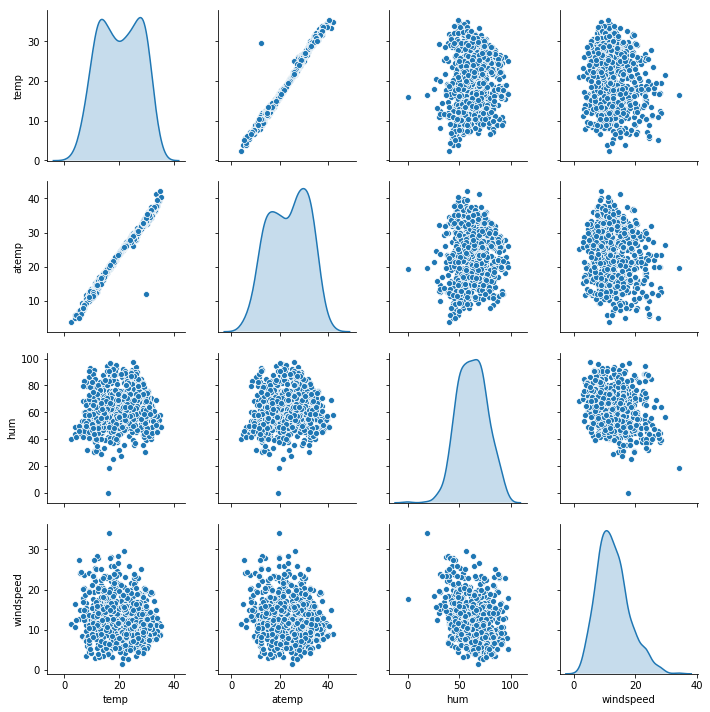

In [128]:
##Copying bike_sharing to another dataframe
num_list=[]
num_list.append(integer_features.columns.values.tolist())
num_list.append(float_features.columns.values.tolist())
num_list=num_list[0]+num_list[1]
num_list
sns.pairplot(bike_sharing[num_list],diag_kind='kde')
plt.show()


# We could see that the atemp , temp and cnt have linear relationship among them and other numeric variables are sparsely correlated

# Analysing the categorical variables and its influence on cnt variable. We analyse using box plot to verify the pattern . Our target variables are

1.season vs cnt

2.weekday vs cnt

3.weathersit vs cnt

4.mnth vs cnt

5.workingday vs cnt

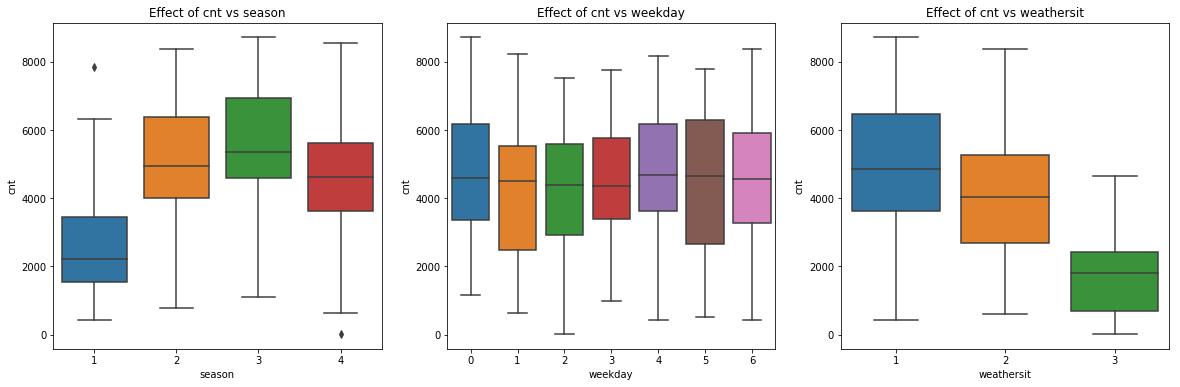

In [129]:
plt.figure(figsize=[20,6])
ax1=plt.subplot(1,3,1)
sns.boxplot(data=bike_sharing,x='season',y='cnt')
plt.title('Effect of cnt vs season')
ax1=plt.subplot(1,3,2)
sns.boxplot(data=bike_sharing,x='weekday',y='cnt')
plt.title('Effect of cnt vs weekday')
ax1=plt.subplot(1,3,3)
sns.boxplot(data=bike_sharing,x='weathersit',y='cnt')
plt.title('Effect of cnt vs weathersit')
plt.show()

# Some observations based on the above box plots are as follows

1.The season determines the cnt variable from the plot the season corresponding to summer and fall have higher cnt values 

2.Weekday does not show strong relation with cnt variable 

3.Weatherit has also some relation with the cnt as the weathersit_1 shows maximum cnt followed by weathersit_2 and weathersit_3 respectively 

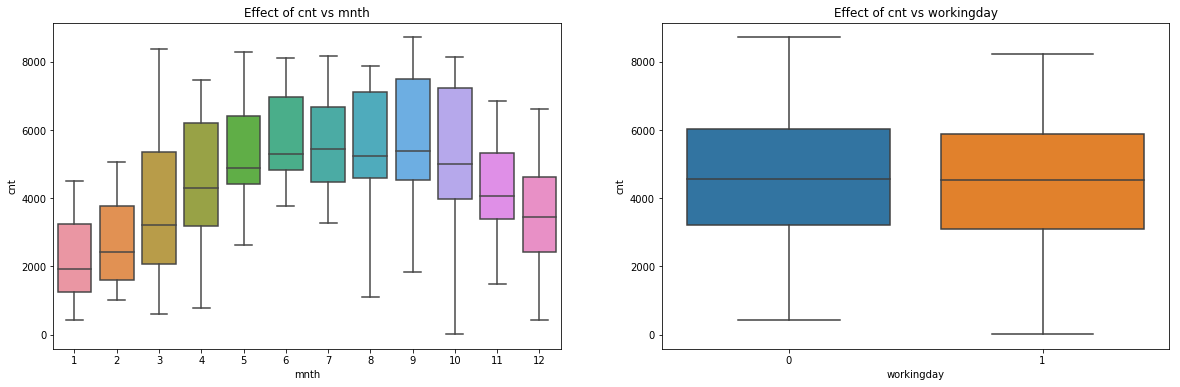

In [130]:
plt.figure(figsize=[20,6])
ax1=plt.subplot(1,2,1)
sns.boxplot(data=bike_sharing,x='mnth',y='cnt')
plt.title('Effect of cnt vs mnth')
ax1=plt.subplot(1,2,2)
sns.boxplot(data=bike_sharing,x='workingday',y='cnt')
plt.title('Effect of cnt vs workingday')
plt.show()




1.The months 5,6,7,8,9 and 10 have some strong influence on cnt this trend might be because this scheme can be popular in the middle of the month and shade away on 11 and 12 (might be due to winter holidays)

2.Working day also has strong influence on cnt . It is observed that irrespective of working day or not there is a significant raise in cnt with non-working day being slighty on the upper side when corresponding to cnt.

In [131]:
##Applying one-hot encoding now

to_convert=['season', 'mnth', 'weekday','weathersit']
status = pd.get_dummies(bike_sharing[to_convert], drop_first = True)

bike_sharing = pd.concat([bike_sharing, status], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [132]:
print('Number of samples and features after encoding are',bike_sharing.shape[0],',',bike_sharing.shape[1],'respectively')

Number of samples and features after encoding are 730 , 34 respectively


In [133]:
##Removing extra categorical columns
bike_sharing.drop(to_convert,inplace=True,axis=1)

# Let us do some plotting to find how well the dependant and independant variables are related after the train-test split

In [134]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 42)

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 683 to 435
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null int64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4 

In [136]:
##We shall rescale the numeric features---temp,atemp,hum,windspeed,cnt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [137]:

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,1,0,0,0,0,0,1,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,1,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,0,...,0,1,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,0,1,0,0,1,0


In [138]:
##Analysing the statistical factors after re-scaling

df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.551091,0.526680,0.653801,0.414566,0.498206
std,0.227401,0.213153,0.143542,0.185671,0.233905
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354176,0.352585,0.544033,0.281934,0.345950
50%,0.575824,0.564951,0.659296,0.383964,0.502233
75%,0.745338,0.698389,0.756762,0.525698,0.677080
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Defining the target variable as y_train and other predictors into X_trian

In [139]:
y_train=df_train.pop('cnt')
X_train=df_train

# Building model steps:

1.Using RFE finding the supportive predictor variables which can be used for further analysis

2.Using stats model we are going to predict the relation of dependant variables with respect to these predictors.

3.We shall drop either the high insignificant p-vaues or the one which gives more VIF >5 step by step and repeat the step 2 until we have all predictor variables to be significant provided they are not multicollinear to each other.

4.Finally we shall build a predictive model on the train and extend the same to the test dataset and measure R2 and adjusted R2 as the efficiency metrics



In [140]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [141]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [142]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 2),
 ('mnth_4', False, 15),
 ('mnth_5', False, 4),
 ('mnth_6', False, 9),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 5),
 ('weekday_2', False, 7),
 ('weekday_3', False, 6),
 ('weekday_4', False, 13),
 ('weekday_5', False, 14),
 ('weekday_6', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [143]:
## Taking only the rfe support columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Building the statistical models with these predictor variables with respect to target variable

In [144]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [145]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod_1 = sm.add_constant(X_train_rfe)

In [146]:
lm = sm.OLS(y_train,X_train_mod_1).fit()   # Running the linear model

In [147]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.3
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          1.17e-184
Time:                        11:14:31   Log-Likelihood:                 483.15
No. Observations:                 510   AIC:                            -934.3
Df Residuals:                     494   BIC:                            -866.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1884      0.031      6.043   

In [148]:
##Analysing multi-collinaerity
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,atemp,1274.28
2,temp,1263.51
4,hum,17.75
7,season_3,7.82
5,windspeed,4.93
6,season_2,4.14
8,season_4,4.11
13,weathersit_2,2.13
0,yr,2.05
11,mnth_11,1.93


# We shall remove hum and atemp from the model because hum does not show any linear relation with the target and the latter atemp is highly correlated with temp

In [149]:
X_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_7,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
683,1,0,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,1,0,1,0
645,1,1,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,1,0
163,0,0,0.717562,0.685963,0.509660,0.708724,1,0,0,0,0,0,0,0,0
360,0,0,0.331287,0.326273,0.785745,0.415925,0,0,0,0,0,0,1,1,0
640,1,0,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,1,0


In [150]:
X_train_rfe.drop(['atemp','hum'],axis=1,inplace=True)

In [151]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod_2 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_mod_2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          7.53e-183
Time:                        11:14:31   Log-Likelihood:                 473.38
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     496   BIC:                            -859.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0941      0.020      4.699   

In [152]:
##Analysing multi-collinaerity
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,16.31
5,season_3,7.39
6,season_4,4.08
3,windspeed,4.02
4,season_2,4.00
0,yr,2.05
9,mnth_11,1.88
7,mnth_7,1.83
11,weathersit_2,1.55
8,mnth_9,1.52


In [153]:
X_train_rfe.drop(['season_3'],axis=1,inplace=True)

In [154]:
##Analysing multi-collinaerity
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.12
3,windspeed,3.87
5,season_4,2.43
0,yr,2.03
4,season_2,1.99
8,mnth_11,1.79
6,mnth_7,1.71
10,weathersit_2,1.55
7,mnth_9,1.37
9,mnth_12,1.29


# We could find that the temperature field is showing VIF>5 and also we could observe that the month_9 is having similar median and upper quartile range as that of month_7 with respect to targeted customers. We shall drop month_7

In [155]:
X_train_rfe.drop(['mnth_7'],axis=1,inplace=True)

In [156]:
##Analysing multi-collinaerity
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.12
3,windspeed,3.80
5,season_4,2.29
0,yr,2.03
7,mnth_11,1.79
4,season_2,1.66
9,weathersit_2,1.54
8,mnth_12,1.29
6,mnth_9,1.24
10,weathersit_3,1.10


# In all these stages we never removed temperature as we could see from the pairplot that the temperature has srong association with the target variable

In [157]:
##We can keep the above parameters for the model

import statsmodels.api as sm  
X_train_mod_2 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_mod_2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          7.68e-179
Time:                        11:14:31   Log-Likelihood:                 458.32
No. Observations:                 510   AIC:                            -892.6
Df Residuals:                     498   BIC:                            -841.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0700      0.020      3.540   

# We could now find that all the coefficients are significant and also no VIF is>5 . So this is our final model.

# Optional checking with the scikit learn model

In [158]:
## Checking with the linear regression model

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_rfe, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
print(lm.intercept_)
print(lm.coef_)

0.06995065825423719
[ 0.24002209 -0.08678818  0.57117798 -0.09972807  0.09514117  0.17491928
  0.09290552 -0.05068878 -0.05615042 -0.08173214 -0.25962757]


In [160]:
#Calculating R2 value and adjusted R2 value

from sklearn.metrics import r2_score
y_pred_train=lm.predict(X_train_rfe)
R2_value=r2_score(y_train,y_pred_train)
print('Train R2 value from sci-kit learn for the given model is',R2_value)

##Getting adjusted R2 value 

##R2= 1- [(1-R2)(N-1)/N-1-p]

#N - Total sample size
#P - Total predictors

N=X_train_rfe.shape[0]
p=X_train_rfe.shape[1]

value=((1-R2_value)*(N-1))/(N-1-p)
adjusted_R2_square=1-value

print('Train Adjusted R2 value from sci-kit learn for the given model is',adjusted_R2_square)

Train R2 value from sci-kit learn for the given model is 0.8222860254307033
Train Adjusted R2 value from sci-kit learn for the given model is 0.8183606163538715


# Statistical test R2 square values and sci-kit learn R2 square values are similar . In statistical model it uses Ordinary Least Square method and in sci-kit learn it uses Gradient Descent for convergence so generally there might be a small variation in the R2 value from both models but not much deviation

In [161]:
##Let us proceed with the test data as training data learning seems promising

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
468,1,0,0,20.295000,24.39980,50.2917,12.791439,7460,1,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,1,27.367500,30.77750,81.8750,14.333846,4788,1,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,1,13.085847,16.06645,62.3750,11.833339,3331,0,0,...,0,0,0,1,0,0,0,0,0,0
355,0,0,0,17.356653,21.30605,75.7500,3.167425,3068,0,0,...,0,1,0,0,0,0,0,1,1,0
515,1,0,1,27.880000,31.56645,49.2917,13.083693,7338,1,0,...,0,0,0,0,0,0,1,0,0,0


In [162]:

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])



In [163]:
##Replicating the same technique as we follwed in training

y_test=df_test.pop('cnt')
X_test=df_test

In [164]:
X_test_rfe = X_test[X_train_rfe.columns]

In [165]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_mod = sm.add_constant(X_test_rfe)
lm = sm.OLS(y_test,X_test_mod).fit()   # Running the linear model
#Let's see the summary of our linear model


# We could find that the test R2 values are also closer to training data's so our model performed good on test data .

# Now as the final part we shall check using scikit learn and re-check if the assumption of linear regression is valid

In [166]:
##Forming the regression eqution using the best fit line
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_test_rfe, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
# Calculating R2 value and adjusted R2 value

from sklearn.metrics import r2_score
y_pred_test=lm.predict(X_test_rfe)
R2_value=r2_score(y_test,y_pred_test)
print('Test R2 value from sci-kit learn for the given model is',R2_value)

##Getting adjusted R2 value 

##R2= 1- [(1-R2)(N-1)/N-1-p]

#N - Total sample size
#P - Total predictors

N=X_test_rfe.shape[0]
p=X_test_rfe.shape[1]

value=((1-R2_value)*(N-1))/(N-1-p)
adjusted_R2_square=1-value

print('Test Adjusted R2 value from sci-kit learn for the given model is',adjusted_R2_square)

Test R2 value from sci-kit learn for the given model is 0.8389132717597231
Test Adjusted R2 value from sci-kit learn for the given model is 0.8303531074570997


# Let us check the validitiy of some assumptions in the linear regression.

1. Features have linear dependancy with the predictor variable. --- We already verified this in pair plot in the begining
2. Error terms are normally distributed.
3. Variance of error term is uniform and follows the same pattern
4. Check for mulit-collinearity 

In [168]:
y_train_price = lm.predict(X_train_rfe)
y_test_price=lm.predict(X_test_rfe)

Text(0.5,1,'Error distribution in test set')

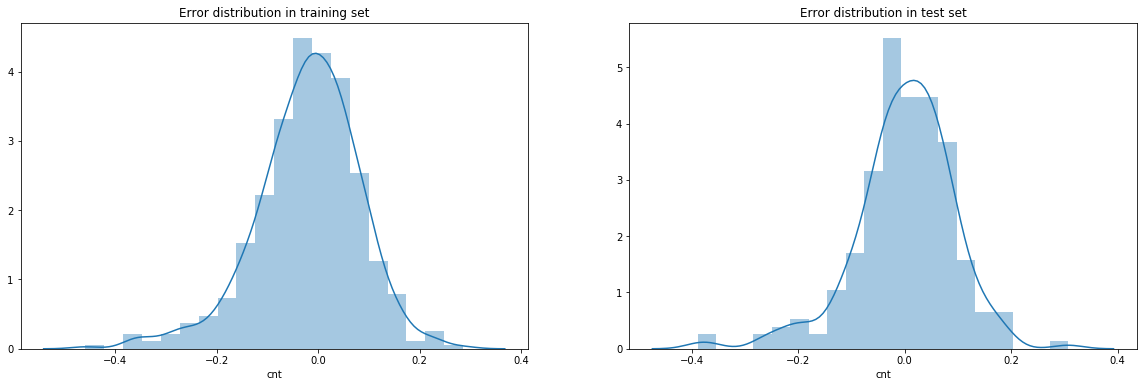

In [169]:
##Error terms are normally distributed
plt.figure(figsize=[20,6])
ax1=plt.subplot(1,2,1)
sns.distplot((y_train - y_train_price), bins = 20)
plt.title('Error distribution in training set')
ax2=plt.subplot(1,2,2)
sns.distplot((y_test - y_test_price), bins = 20)
plt.title('Error distribution in test set')


## Clearly the error term is showing normal distribution in training and test data

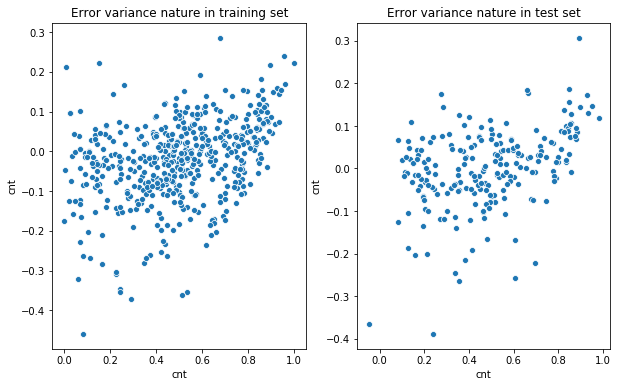

In [170]:
plt.figure(figsize=[10,6])
ax1=plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train - y_train_price)
plt.title('Error variance nature in training set')
ax2=plt.subplot(1,2,2)
sns.scatterplot(y_test,y_test - y_test_price)
plt.title('Error variance nature in test set')
plt.show()

# We could find that the distribution of variance of error is clustered in the center and there is not any deviating trend in the variance

# From multi-collinearity we found like VIF for all predictor variables <5 so we are good 

In [171]:
##Final model evaluation

from sklearn.metrics import r2_score
r2_score(y_test, y_test_price)

0.8389132717597231